# Section 1 Introduction

In [1]:
import pandas as pd ##pandas is imported as pd as a shorthathand when using the library 
import numpy as np ##Numpy is imported as np as a shorthathand when using the library 
import seaborn as sns #visualisation
from sklearn.preprocessing import StandardScaler
from scipy import stats  ###used for t test
from scipy.stats import ttest_ind  ##indepent t test
import matplotlib.pyplot as plt

In [2]:
##pandas used to read in bikes dataset 
dft = pd.read_csv("BikeshareTorontoMar2023.csv")
dfla = pd.read_csv("BikeshareLAQ3.csv")





C:\Users\T\AppData\Local\Temp\ipykernel_21412\1367776806.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dfla = pd.read_csv("BikeshareLAQ3.csv")


# Section 1.1 data cleaning and exploration of LA data

In [3]:
##I had an issue with geoplot code because there was some sort of na value present.
##The code below has listed all the possible missing values. 

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
dfla = pd.read_csv("BikeshareLAQ3.csv", na_values = missing_value_formats)

C:\Users\T\AppData\Local\Temp\ipykernel_21412\4218395995.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dfla = pd.read_csv("BikeshareLAQ3.csv", na_values = missing_value_formats)


In [4]:
dfla.shape

(130753, 15)

In [5]:
dfla.isnull().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat                22
start_lon                22
end_station               0
end_lat                2061
end_lon                2061
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
dtype: int64

In [6]:
##lets look at some of the null value rows to try and find a connection between them.
rows_with_nulls = dfla[dfla.isnull().any(axis=1)]
print(rows_with_nulls)

          trip_id  duration       start_time         end_time  start_station  \
32      276705846       498    7/1/2023 2:21   7/1/2023 10:39           4627   
33      276718188       518    7/1/2023 2:27   7/1/2023 11:05           4627   
50      276668310        17    7/1/2023 6:51    7/1/2023 7:08           3011   
118     276773997         5    7/1/2023 9:03    7/1/2023 9:08           3037   
249     276745105        20   7/1/2023 10:35   7/1/2023 10:55           4523   
...           ...       ...              ...              ...            ...   
130394  307599172        10  9/30/2023 18:14  9/30/2023 18:24           4524   
130458  307599277        36  9/30/2023 18:44  9/30/2023 19:20           4214   
130493  307577452         5  9/30/2023 19:01  9/30/2023 19:06           3006   
130696  307721332        17  9/30/2023 22:20  9/30/2023 22:37           4482   
130716  307735548        15  9/30/2023 22:40  9/30/2023 22:55           4301   

        start_lat   start_lon  end_stat

In [7]:
rows_with_nulls.head(100)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
32,276705846,498,7/1/2023 2:21,7/1/2023 10:39,4627,34.101849,-118.325142,3000,NaN,NaN,30114,1,One Way,One Day Pass,electric
33,276718188,518,7/1/2023 2:27,7/1/2023 11:05,4627,34.101849,-118.325142,3000,NaN,NaN,28881,1,One Way,Walk-up,electric
50,276668310,17,7/1/2023 6:51,7/1/2023 7:08,3011,34.041130,-118.267982,3000,NaN,NaN,20119,1,One Way,One Day Pass,standard
118,276773997,5,7/1/2023 9:03,7/1/2023 9:08,3037,34.034801,-118.231277,3000,NaN,NaN,23373,365,One Way,Annual Pass,electric
249,276745105,20,7/1/2023 10:35,7/1/2023 10:55,4523,34.068748,-118.309280,3000,NaN,NaN,24046,30,One Way,Monthly Pass,electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,278358698,4,7/6/2023 13:13,7/6/2023 13:17,3064,34.046131,-118.257591,3000,NaN,NaN,6631,365,One Way,Annual Pass,standard
7299,278612608,1278,7/6/2023 13:41,7/7/2023 10:59,4450,34.063492,-118.287163,3000,NaN,NaN,30176,30,One Way,Monthly Pass,electric
7322,278346380,12,7/6/2023 14:08,7/6/2023 14:20,3011,34.041130,-118.267982,3000,NaN,NaN,20033,30,One Way,Monthly Pass,standard
7347,278359132,28,7/6/2023 14:29,7/6/2023 14:57,4214,33.995560,-118.481552,3000,NaN,NaN,6617,1,One Way,Walk-up,standard


##Looks like mostly one-way trips result in the null values

In [94]:
#This shows me the null values aren't exclusive to One way trips
unique_trip_category = rows_with_nulls['trip_route_category'].unique()

In [95]:
unique_trip_category 

array(['One Way', 'Round Trip'], dtype=object)

In [9]:
##The information is further confirmation that the null values weren't exclusive to One way trips

dfla_value_counts = dfla['trip_route_category'].value_counts()
print(dfla_value_counts )

trip_route_category
One Way       107025
Round Trip     23728
Name: count, dtype: int64


In [10]:
print(unique_trip_category)

['One Way' 'Round Trip']


In [11]:
value_counts = rows_with_nulls['trip_route_category'].value_counts()

print(value_counts)

trip_route_category
One Way       2041
Round Trip      20
Name: count, dtype: int64


In [12]:
# drop all rows with NaN values
dfla = dfla.dropna(axis=0)

# check if we have any NaN values in our dataset
dfla.isnull().values.any()



False

In [13]:
dfla.isnull().sum()

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
dtype: int64

In [14]:
##Look at what the LA dataset looks like
dfla.head() 

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,276590229,1,7/1/2023 0:01,7/1/2023 0:02,4215,34.014309,-118.491341,4215,34.014309,-118.491341,30096,1,Round Trip,Walk-up,electric
1,276590710,16,7/1/2023 0:02,7/1/2023 0:18,4494,34.075981,-118.256012,3031,34.044701,-118.252441,24279,30,One Way,Monthly Pass,electric
2,276613156,148,7/1/2023 0:02,7/1/2023 2:30,4215,34.014309,-118.491341,4215,34.014309,-118.491341,30240,1,Round Trip,Walk-up,electric
3,276590579,3,7/1/2023 0:03,7/1/2023 0:06,4215,34.014309,-118.491341,4215,34.014309,-118.491341,25395,1,Round Trip,Walk-up,electric
4,276613157,146,7/1/2023 0:04,7/1/2023 2:30,4215,34.014309,-118.491341,4215,34.014309,-118.491341,30084,1,Round Trip,Walk-up,electric


In [15]:
##The describe function will allow me to see the spread of the data
dfla.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,1.286920e+05,128692.000000,128692.000000,128692.000000,128692.000000,128692.00000,128692.000000,128692.000000,128692.000000
mean,2.922786e+08,32.772736,3997.353783,34.034002,-118.346399,4000.92604,34.033939,-118.346831,48.237637
std,8.939550e+06,83.489098,636.527030,0.038379,0.095739,633.54718,0.038029,0.096024,96.022533
min,2.765902e+08,1.000000,3005.000000,33.928459,-118.491341,3005.00000,33.928459,-118.491341,1.000000
25%,2.845527e+08,7.000000,3068.000000,34.003510,-118.451248,3068.00000,34.014309,-118.451248,1.000000
50%,2.923585e+08,16.000000,4215.000000,34.042110,-118.292183,4215.00000,34.042061,-118.294662,30.000000
75%,2.999677e+08,29.000000,4516.000000,34.051941,-118.258537,4516.00000,34.051102,-118.258537,30.000000
max,3.103289e+08,1440.000000,4660.000000,34.177650,-118.225410,4660.00000,34.177650,-118.225410,365.000000


In [16]:
##seems to be outliers because the max value for trip duration 1440 mins is way higher than the mean 32mins

<Axes: xlabel='duration'>

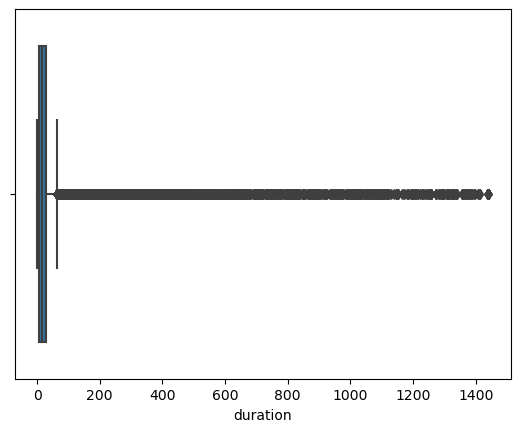

In [17]:
sns.boxplot(x=dfla["duration"])

The box plot shows that there is multiple outliers for long duration trips. 
The result is positively skewed with most of the data aggregating at the lower trip duration times.

In [19]:
dfla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128692 entries, 0 to 130752
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              128692 non-null  int64  
 1   duration             128692 non-null  int64  
 2   start_time           128692 non-null  object 
 3   end_time             128692 non-null  object 
 4   start_station        128692 non-null  int64  
 5   start_lat            128692 non-null  float64
 6   start_lon            128692 non-null  float64
 7   end_station          128692 non-null  int64  
 8   end_lat              128692 non-null  float64
 9   end_lon              128692 non-null  float64
 10  bike_id              128692 non-null  object 
 11  plan_duration        128692 non-null  int64  
 12  trip_route_category  128692 non-null  object 
 13  passholder_type      128692 non-null  object 
 14  bike_type            128692 non-null  object 
dtypes: float64(4), int64(5

In [20]:
dfla['start_time'] = pd.to_datetime(dfla['start_time'], format='%m/%d/%Y %H:%M')
dfla['end_time'] = pd.to_datetime(dfla['end_time'], format='%m/%d/%Y %H:%M')


In [21]:
dfla['onlyDate'] = dfla['start_time'].dt.date

In [ ]:
##might take out
dfla['num_rentals'] = dfla['trip_id'].nunique()

In [22]:
dfla_daily = dfla.groupby('onlyDate')['num_rentals'].nunique()

In [23]:
dfla_daily=dfla_daily.reset_index()

In [24]:
dfla_daily.shape

(92, 2)

In [25]:
dfla_daily.describe()

,trip_id
count,92.000000
mean,1398.826087
std,201.140846
min,195.000000
25%,1300.250000
50%,1394.000000
75%,1513.000000
max,1839.000000


In [26]:
##that minmum trip is very low compared to the mean

<Axes: xlabel='trip_id'>

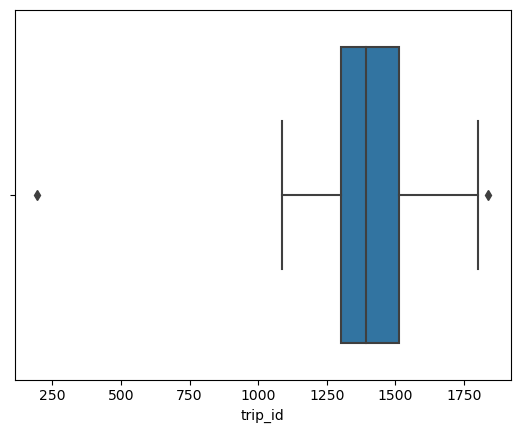

In [27]:
sns.boxplot(x=dfla_daily["num_rentals"])

In [28]:
##This visual is showing the 190 min outlier and the max outlier 1839, you can see the that 190 is far from the mean (blue box).
#most of the data falls within the IQR  wih some variability that is represented by the whiskers and the outliers.

In [67]:
from scipy.stats import shapiro

In [68]:
#analysis of the dates to see if there was anything signficant happening on the outlier days.
# Calculate IQR
Q1 = dfla_daily['num_rentals'].quantile(0.25)
Q3 = dfla_daily['num_rentals'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds using standard 1.5 multiplier
#adjusting the multiplier can affect the range of outlier selection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = dfla_daily[(dfla_daily['num_rentals'] < lower_bound) | (dfla_daily['num_rentals'] > upper_bound)]
print("Outlier Dates and Counts:")
print(outliers)


Outlier Dates and Counts:
      onlyDate  trip_id
50  2023-08-20      195
88  2023-09-27     1839


In [ ]:
## 2023-08-20  is LA there was a major hurrican Hilary was on this day
#2023-09-27  Seasonal ice skating rings were open to the public 

#I have determined that the events above aren't typical to a day in LA

In [ ]:
#The Shapiro-Wilk test on the 'num_rentals' column
stat, p_value = shapiro(dfla_daily['num_rentals'])

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

In [ ]:
#remove outliers
#This data will represent a typical rental day in LA
dfla_daily_no_outliers = dfla_daily[
    (dfla_daily['num_rentals'] >= lower_bound) & (dfla_daily['num_rentals'] <= upper_bound)
]


In [ ]:
#The Shapiro-Wilk test on the 'num_rentals' column
stat, p_value = shapiro(dfla_daily_no_outliers['num_rentals'])

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

# Section 1.2 Data cleaning and exploration of Dublin city data

In [33]:
###12 months of data
df1 = pd.read_csv("dublinbike-historical-data-2023-01.csv")
df2 = pd.read_csv("dublinbike-historical-data-2023-02.csv")
df3 = pd.read_csv("dublinbike-historical-data-2023-03.csv")
df4 = pd.read_csv("dublinbike-historical-data-2023-04.csv")
df5 = pd.read_csv("dublinbike-historical-data-2023-05.csv")

df6 = pd.read_csv("dublinbike-historical-data-2023-06.csv")
df7 = pd.read_csv("dublinbike-historical-data-2023-07.csv")
df8 = pd.read_csv("dublinbike-historical-data-2023-08.csv")
df9 = pd.read_csv("dublinbike-historical-data-2023-09.csv")
df10 = pd.read_csv("dublinbike-historical-data-2023-10.csv")
df11 = pd.read_csv("dublinbike-historical-data-2023-11.csv")
df12 = pd.read_csv("dublinbike-historical-data-2023-12.csv")

In [34]:
###use concat to stack the data into one dataframe
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12],ignore_index=True)   

In [35]:
##to check if each variable is in the right format
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994400 entries, 0 to 1994399
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   STATION ID             int64  
 1   TIME                   object 
 2   LAST UPDATED           object 
 3   NAME                   object 
 4   BIKE_STANDS            int64  
 5   AVAILABLE_BIKE_STANDS  int64  
 6   AVAILABLE_BIKES        int64  
 7   STATUS                 object 
 8   ADDRESS                object 
 9   LATITUDE               float64
 10  LONGITUDE              float64
dtypes: float64(2), int64(4), object(5)
memory usage: 167.4+ MB


In [49]:
##rename to remove the space because spaces can cause issues when coding 
df = df.rename(columns={"STATION ID": "station_id"})
df = df.rename(columns={"LAST UPDATED":"last_reported"})
##changed the name because it's more appropriate
df = df.rename(columns={"AVAILABLE_BIKES":"num_bikes_available"})


In [ ]:
df.describe()

In [46]:
 ###used to see what the dataset looks like
df.head()

,station_id,TIME,last_reported,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ADDRESS,LATITUDE,LONGITUDE
0,1,2023-01-01 00:00:03,2022-12-31 23:59:39,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.26250
1,2,2023-01-01 00:00:03,2022-12-31 23:57:48,BLESSINGTON STREET,20,18,2,Blessington Street,53.3568,-6.26814
2,3,2023-01-01 00:00:03,2022-12-31 23:57:10,BOLTON STREET,20,9,11,Bolton Street,53.3512,-6.26986
3,4,2023-01-01 00:00:03,2022-12-31 23:51:39,GREEK STREET,20,8,12,Greek Street,53.3469,-6.27298
4,5,2023-01-01 00:00:03,2022-12-31 23:58:28,CHARLEMONT PLACE,40,16,24,Charlemont Street,53.3307,-6.26018


In [ ]:
##check the range of data
df.tail() 

In [ ]:
df.dtypes ##Used this function to check if all the columns in the dataset are in the right format 

In [ ]:
##checking unique values in the dataset will help me decide what columns don't provide any useful information 
df.nunique() 

In [37]:
####used to remove columns not required

df = df.drop(["STATUS"], axis=1)
#smaller datasets are easier to process and work with. 

In [ ]:
##To see how big the dataset is 
df.shape 

In [38]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
###number of duplicate rows is 0

number of duplicate rows:  (0, 10)


In [ ]:
df.count() 

##no empty rows

In [ ]:
print(df.isnull().sum()) ##confrimed no null

In [ ]:
df.describe()  ##spread of the numeric values   ##min and max very important when trying to scale the data

In [47]:
df['last_reported'] = pd.to_datetime(df['last_reported'], format='%Y-%m-%d %H:%M:%S') ##last reported is has to be in the datetime format in order to do datetime manipulations

In [50]:
df.sort_values(by=['station_id', 'last_reported'], inplace=True)
df['num_bikes_change'] = df.groupby('station_id')['num_bikes_available'].diff().fillna(0) ##groups the dataset by station id and the number of available bikes and gets the difference from one row to the next
df['num_rentals'] = df['num_bikes_change'].clip(upper=0).abs().fillna(0) ##the change in bikes are placed ina column called the number of bike rentals 

In [ ]:
##checking what the dataset looks like after the addition of the number of rentals and number of bike change columns
df.head() 

In [ ]:
df.tail()

In [ ]:
df.shape ##used to check the size of the dataset

In [ ]:
df.info()

In [51]:
##extracting addtional columns to gain more insight in cycling in dublin 
df['date'] = df['last_reported'].dt.date  
df['year'] = df['last_reported'].dt.year
df['day_of_week'] =df['last_reported'].dt.dayofweek
df['day_of_week_name'] = df['last_reported'].dt.day_name()
df['month'] = df['last_reported'].dt.month
df['month_name'] = df['last_reported'].dt.month_name()
df['day_of_month'] = df['last_reported'].dt.day
df['hour_of_day'] = df['last_reported'].dt.hour

In [52]:
###Adding weekday and weekend columns 
df['is_weekend'] = df['last_reported'].dt.day_name().isin(['Saturday', 'Sunday'])
df.head()

,station_id,TIME,last_reported,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,num_bikes_available,ADDRESS,LATITUDE,LONGITUDE,...,num_rentals,date,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day,is_weekend
0,1,2023-01-01 00:00:03,2022-12-31 23:59:39,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2022-12-31,2022,5,Saturday,12,December,31,23,True
113,1,2023-01-01 00:30:02,2023-01-01 00:21:23,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2023-01-01,2023,6,Sunday,1,January,1,0,True
226,1,2023-01-01 01:00:03,2023-01-01 00:50:23,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2023-01-01,2023,6,Sunday,1,January,1,0,True
339,1,2023-01-01 01:30:03,2023-01-01 01:20:40,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2023-01-01,2023,6,Sunday,1,January,1,1,True
452,1,2023-01-01 02:00:03,2023-01-01 01:50:55,CLARENDON ROW,31,31,0,Clarendon Row,53.3409,-6.2625,...,0.0,2023-01-01,2023,6,Sunday,1,January,1,1,True


In [ ]:
## the tilde will invert the logic to make weekday
df['is_weekday'] = ~df['is_weekend']  

In [ ]:
df.head()

In [ ]:
##check the format of the new date columns
df.info() 

In [53]:
##making a dataset with the focus on the number of rentals to join with the weather dataset
df_daily = df.groupby(['date']).agg({'num_rentals': np.sum}) 

In [54]:
df_daily.head()

,num_rentals
date,
2022-12-31,0.0
2023-01-01,1122.0
2023-01-02,1413.0
2023-01-03,2555.0
2023-01-04,2757.0


In [ ]:
##shape makes sense its the last day in 2022 to the last day in 2023 
df_daily.shape 

In [ ]:
df_daily.info

In [55]:
##initialise the new  reset index the reset of the index will extract the date column from the index
df_dailyt = df_daily.reset_index() 

In [ ]:
##2 columns now , it was perviously 1  --> I need to do this so I can join with the weather dataset
df_dailyt.shape 

In [ ]:
df_dailyt.info()

In [ ]:
df_dailyt.head()

In [ ]:
 ###Had to bring this to a date format to the same date format as the weather data so I join both datasets on the date column
df_dailyt['date'] = pd.to_datetime(df_dailyt['date'], format='%Y-%m-%d') 

In [56]:
##extracting addtional columns to gain more insight in cycling in dublin 
  
df_dailyt['year'] = df['last_reported'].dt.year
df_dailyt['day_of_week'] =df['last_reported'].dt.dayofweek
df_dailyt['day_of_week_name'] = df['last_reported'].dt.day_name()
df_dailyt['month'] = df['last_reported'].dt.month
df_dailyt['month_name'] = df['last_reported'].dt.month_name()
df_dailyt['day_of_month'] = df['last_reported'].dt.day
df_dailyt['hour_of_day'] = df['last_reported'].dt.hour  


In [ ]:
##summary data for the continous columns
df_dailyt.describe()  

In [ ]:
##its clear that there are outliers present in the dataset with the min being 0 
#I will investigate this further 

In [ ]:
sns.boxplot(x=df_dailyt["num_rentals"])

In [63]:
##remove the 0 rentals
df_dailyt = df_dailyt[df_dailyt['num_rentals'] != 0]

In [64]:
df_dailyt.head()

,date,num_rentals,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day
1,2023-01-01,1122.0,2022,5,Saturday,12,December,31,23
2,2023-01-02,1413.0,2022,5,Saturday,12,December,31,23
3,2023-01-03,2555.0,2022,5,Saturday,12,December,31,23
4,2023-01-04,2757.0,2022,5,Saturday,12,December,31,23
5,2023-01-05,2811.0,2022,5,Saturday,12,December,31,23


In [69]:
#analysis of the dates to see if there was anything signficant happening on the outlier days.
# Calculate IQR
Q1 = df_dailyt['num_rentals'].quantile(0.25)
Q3 = df_dailyt['num_rentals'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds using standard 1.5 multiplier
#adjusting the multiplier can affect the range of outlier selection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df_dailyt[(df_dailyt['num_rentals'] < lower_bound) | (df_dailyt['num_rentals'] > upper_bound)]
print("Outlier Dates and Counts:")
print(outliers)


Outlier Dates and Counts:
Empty DataFrame
Columns: [date, num_rentals, year, day_of_week, day_of_week_name, month, month_name, day_of_month, hour_of_day]
Index: []


<Axes: xlabel='num_rentals'>

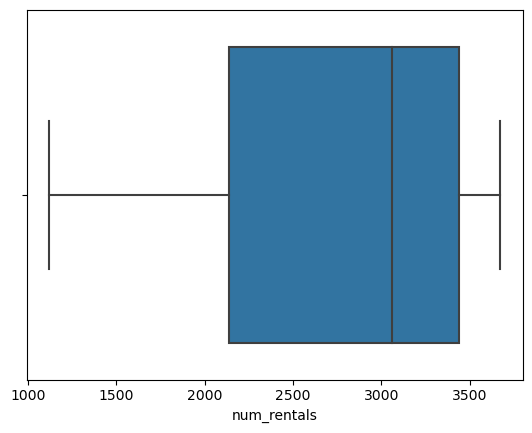

In [92]:
sns.boxplot(x=Q1["num_rentals"])

In [70]:
df_dailyt.head()

,date,num_rentals,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day
1,2023-01-01,1122.0,2022,5,Saturday,12,December,31,23
2,2023-01-02,1413.0,2022,5,Saturday,12,December,31,23
3,2023-01-03,2555.0,2022,5,Saturday,12,December,31,23
4,2023-01-04,2757.0,2022,5,Saturday,12,December,31,23
5,2023-01-05,2811.0,2022,5,Saturday,12,December,31,23


In [71]:
#The Shapiro-Wilk test on the 'num_rentals' column
stat, p_value = shapiro(df_dailyt['num_rentals'])

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.9133687615394592
p-value: 1.2312256791359444e-13
The data does not appear to be normally distributed (reject H0).


In [72]:
##Working of the assumption that nice weather results in more rentals, and inversely bad weather results in bad weather.
monthly_rentals = df.groupby('month_name')['num_rentals'].sum()


In [73]:
print(monthly_rentals)

month_name
April         85348.0
August        92858.0
December      71360.0
February      82131.0
January       82202.0
July          91375.0
June          96488.0
March         88291.0
May          102553.0
November      90221.0
October       93294.0
September     91499.0
Name: num_rentals, dtype: float64


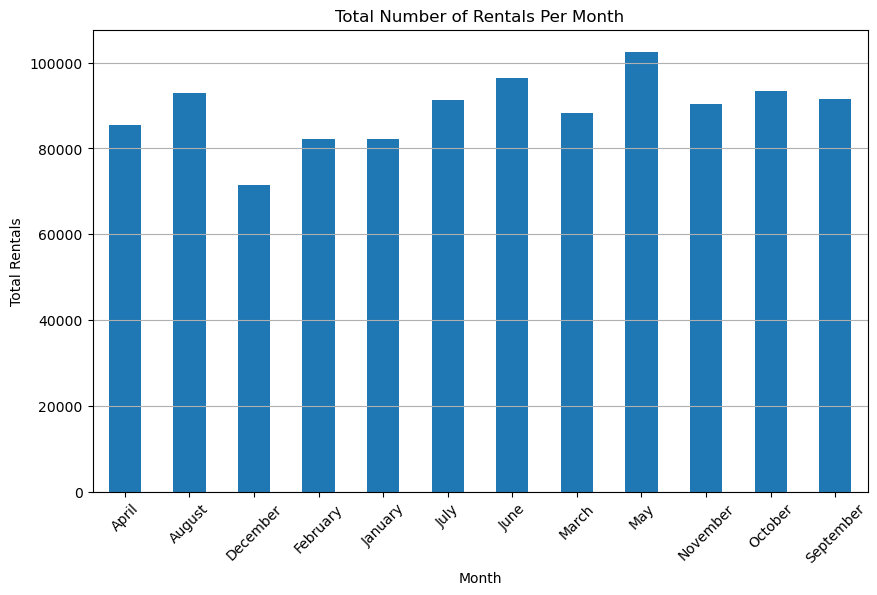

In [93]:
# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_rentals.plot(kind='bar')
plt.title('Total Number of Rentals Per Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [74]:
###data appears to be not normal so I will take July hourly rentals 

#filter for the month of July
df_hourly_july = df[df['month_name'] == 'July']


In [75]:
##extract the hour 

df_hourly_july['hour'] = df_hourly_july['last_reported'].dt.hour

C:\Users\T\AppData\Local\Temp\ipykernel_21412\399404220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hourly_july['hour'] = df_hourly_july['last_reported'].dt.hour


In [76]:
##group the number of rentals per hour 
rentals_per_hour_july = df_hourly_july.groupby(['last_reported', 'hour'])['num_rentals'].sum().reset_index()


In [77]:
rentals_per_hour_july.head()

,last_reported,hour,num_rentals
0,2023-07-01 00:19:53,0,0.0
1,2023-07-01 00:19:57,0,0.0
2,2023-07-01 00:20:01,0,0.0
3,2023-07-01 00:20:05,0,0.0
4,2023-07-01 00:20:07,0,0.0


In [ ]:
unique_rentals = rentals_per_hour_july['num_rentals'].unique()

print(unique_rentals)

In [78]:
 #Filter data between 9:00 AM (hour 9) and 12:00 AM (hour 23)
filtered_data = rentals_per_hour_july[(rentals_per_hour_july['hour'] >= 9) & (rentals_per_hour_july['hour'] <= 23)]

In [79]:
#The Shapiro-Wilk test on the 'num_rentals' column
stat, p_value = shapiro(filtered_data['num_rentals'])

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.4920065999031067
p-value: 0.0
The data does not appear to be normally distributed (reject H0).


C:\Users\T\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [80]:
##gaind lots of information but no normal data 

#Log data 

df_dailyt.head()

,date,num_rentals,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day
1,2023-01-01,1122.0,2022,5,Saturday,12,December,31,23
2,2023-01-02,1413.0,2022,5,Saturday,12,December,31,23
3,2023-01-03,2555.0,2022,5,Saturday,12,December,31,23
4,2023-01-04,2757.0,2022,5,Saturday,12,December,31,23
5,2023-01-05,2811.0,2022,5,Saturday,12,December,31,23


In [82]:
##Date wasn't in the datetime format for some reason
df_dailyt['date'] = pd.to_datetime(df_dailyt['date'])

In [83]:
Q1 = df_dailyt[(df_dailyt['date'] >= '2023-01-01') & (df_dailyt['date'] <= '2023-03-31')]


<Axes: xlabel='num_rentals'>

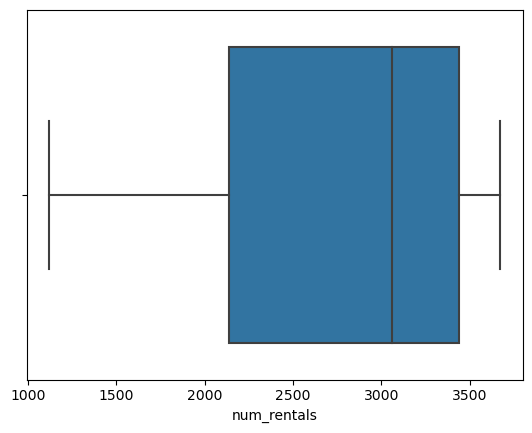

In [84]:
sns.boxplot(x=Q1["num_rentals"]) ##the data is skewed 

In [85]:
df_dailyt['is_weekend'] = df_dailyt['date'].dt.day_name().isin(['Saturday', 'Sunday'])

In [86]:
df_dailyt['is_weekday'] = ~df_dailyt['is_weekend']  

In [87]:
df_dailyt.head()

,date,num_rentals,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day,is_weekend,is_weekday
1,2023-01-01,1122.0,2022,5,Saturday,12,December,31,23,True,False
2,2023-01-02,1413.0,2022,5,Saturday,12,December,31,23,False,True
3,2023-01-03,2555.0,2022,5,Saturday,12,December,31,23,False,True
4,2023-01-04,2757.0,2022,5,Saturday,12,December,31,23,False,True
5,2023-01-05,2811.0,2022,5,Saturday,12,December,31,23,False,True


In [88]:
# Separate weekend and weekday data
weekend_rentals = df_dailyt[df_dailyt['is_weekend'] == True]['num_rentals']
weekday_rentals = df_dailyt[df_dailyt['is_weekday'] == True]['num_rentals']

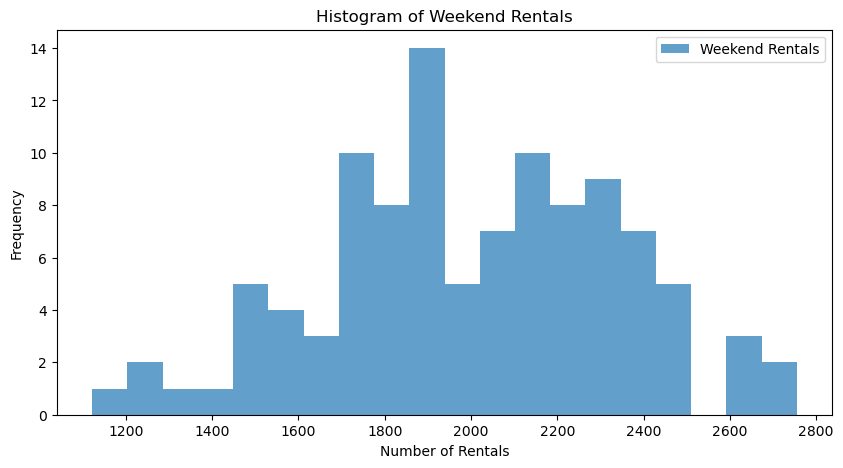

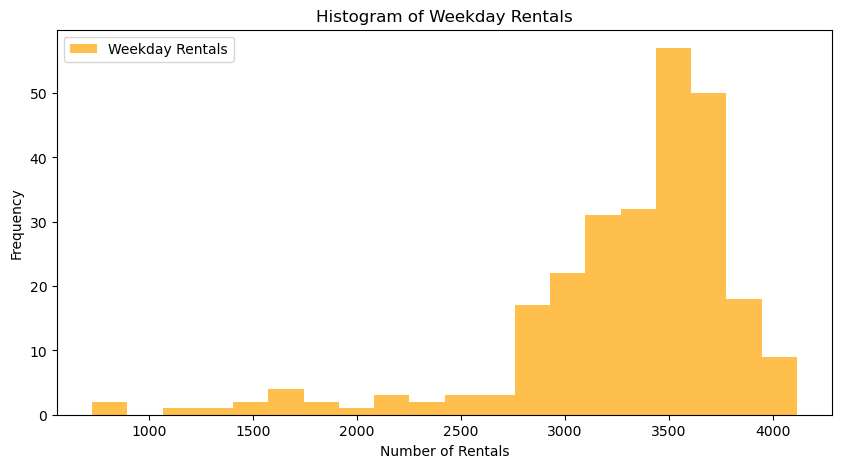

In [89]:
# Plot histogram for weekend rentals
plt.figure(figsize=(10, 5))
plt.hist(weekend_rentals, bins=20, alpha=0.7, label='Weekend Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.title('Histogram of Weekend Rentals')
plt.legend()
plt.show()

# Plot histogram for weekday rentals
plt.figure(figsize=(10, 5))
plt.hist(weekday_rentals, bins=20, alpha=0.7, color='orange', label='Weekday Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.title('Histogram of Weekday Rentals')
plt.legend()
plt.show()

In [90]:
#The Shapiro-Wilk test on the 'num_rentals' column
stat, p_value = shapiro(weekend_rentals)

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.9914825558662415
p-value: 0.7556470632553101
The data appears to be normally distributed (fail to reject H0).


In [91]:
#The Shapiro-Wilk test on the weekday 'num_rentals' column
stat, p_value = shapiro(weekday_rentals)

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.8159146308898926
p-value: 7.38692006995657e-17
The data does not appear to be normally distributed (reject H0).


# Section 1.3 Data exploration of Toronto data 

In [ ]:
dft.info()

In [ ]:
dft = dft.rename(columns={"Trip Id": "trip_id"})
dft = dft.rename(columns={"Trip  Duration": "trip_duration"})##easier to work with no spaces

In [ ]:

dft['num_rentals'] = dft['trip_id'].nunique()


In [ ]:
print(dft.nunique())

In [ ]:
dft.head()

In [ ]:
dft.info()

In [ ]:
##Need to put the dates in the right format
dft['Start Time'] = pd.to_datetime(dft['Start Time'], format='%m/%d/%Y %H:%M')
dft['End Time'] = pd.to_datetime(dft['End Time'], format='%m/%d/%Y %H:%M')


In [ ]:
#Have to use the dt date function so the data is represented daily for comparison to the dublin dataset
dft['onlyDate'] = dft['Start Time'].dt.date 

In [ ]:
dft.head()

In [ ]:
dft_daily = dft.groupby('onlyDate')['num_rentals'].nunique()

In [ ]:
dft_daily.head

In [ ]:
dft_daily=dft_daily.reset_index()

In [ ]:
dft_daily.shape

In [ ]:
dft_daily.head()

In [ ]:
##lets see if the trip data is normal 
sns.boxplot(x=dft_daily["num_rentals"])

In [ ]:
#The Shapiro-Wilk test on the 'num_rentals' column
stat, p_value = shapiro(dft_daily['num_rentals'])

# Display the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

# weather data

In [98]:
####weather data 
weather_data = pd.read_csv("dweather.csv")

In [99]:
weather_data.head()

,date,ind,maxtp,ind.1,mintp,igmin,ind.2,rain,cbl,wdsp,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-Jan-42,0,9.7,0,6.8,0,2,0.0,1020.3,17.2,...,,0.0,0,,,1.1,1.4,,,
1,02-Jan-42,0,9.9,0,7.9,0,0,0.1,1016.2,15.2,...,,0.0,0,,,0.7,0.9,,,
2,03-Jan-42,0,11.2,0,8.9,0,0,1.5,1006.8,14.0,...,,0.1,0,,,0.5,0.6,,,
3,04-Jan-42,0,9.2,0,2.7,0,0,3.5,1001.5,17.0,...,,0.6,0,,,0.6,0.7,,,
4,05-Jan-42,0,3.5,1,-0.8,0,0,0.6,1013.4,13.0,...,,3.4,0,,,0.6,0.7,,,


In [ ]:
weather_data.tail()

In [ ]:
weather_data.info()

In [100]:
weather_data['date'] = pd.to_datetime(weather_data['date'])  ##convert to date format 

C:\Users\T\AppData\Local\Temp\ipykernel_21412\1801666782.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
weather_data.info

In [ ]:
weather_data.head()

In [ ]:
weather_data.tail()

In [101]:
start_date =('2023-01-01') 
end_date =('2023-12-31')    


In [102]:
##will filter for the weather in the same range as the dublin bikes dataset
weather_df = weather_data[(weather_data['date'] >= start_date) & (weather_data['date'] < end_date)]

In [ ]:
weather_df.shape

In [ ]:
weather_df.nunique()

In [103]:
weather_df = weather_df.drop(["soil", "g_rad","pe","evap","smd_wd","smd_md","smd_pd","ind" ], axis=1)  ##drop 

In [ ]:
#df_daily.reset_index().head()

In [ ]:
weather_df.head()

In [ ]:
#df_daily=df_daily.reset_index().head()

In [ ]:
#df_daily.info()

In [104]:
final_df = pd.merge(df_dailyt, weather_df, on='date', how ='inner') ###needs to be wrapped in a list to make the join work

In [ ]:
final_df.tail()

In [ ]:
final_df.shape  

In [105]:
final_df.head()

,date,num_rentals,year,day_of_week,day_of_week_name,month,month_name,day_of_month,hour_of_day,is_weekend,...,cbl,wdsp,ind.3,hm,ind.4,ddhm,ind.5,hg,sun,dos
0,2023-01-01,1122.0,2022,5,Saturday,12,December,31,23,True,...,991.5,5.5,0,11,0,280,0,18,0.2,0
1,2023-01-02,1413.0,2022,5,Saturday,12,December,31,23,False,...,1002.6,6.2,0,14,0,160,0,20,6.8,0
2,2023-01-03,2555.0,2022,5,Saturday,12,December,31,23,False,...,996.3,12.5,0,19,0,240,0,35,0.0,0
3,2023-01-04,2757.0,2022,5,Saturday,12,December,31,23,False,...,998.7,13.7,0,21,0,260,0,34,0.5,0
4,2023-01-05,2811.0,2022,5,Saturday,12,December,31,23,False,...,1000.5,10.3,0,19,0,190,0,29,0.0,0


In [106]:
final_df.info()  ##quick check that anomolies weren't introduced as a result of the merge

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              364 non-null    datetime64[ns]
 1   num_rentals       364 non-null    float64       
 2   year              364 non-null    int32         
 3   day_of_week       364 non-null    int32         
 4   day_of_week_name  364 non-null    object        
 5   month             364 non-null    int32         
 6   month_name        364 non-null    object        
 7   day_of_month      364 non-null    int32         
 8   hour_of_day       364 non-null    int32         
 9   is_weekend        364 non-null    bool          
 10  is_weekday        364 non-null    bool          
 11  maxtp             364 non-null    float64       
 12  ind.1             364 non-null    int64         
 13  mintp             364 non-null    float64       
 14  igmin             364 non-

In [109]:
file_path = "C:\\Users\\T\\Documents\MSC semester 2\\Big project 1\\final_df.csv"  # Specify the file name or path
final_df.to_csv(file_path, index=False)  # Set index=False to exclude the DataFrame index

# Section 2 Statistics

# Section2 .1Descriptive statistics 

#going to do some descriptive statistics on the Final df

In [ ]:
final_df.describe()  
##good to see the spread of data for each column , will let me know if I need to scale data before using machine learning models

In [ ]:
##the mean and median for the rain column are very different with the mean 2.745604 and median 0.400000

In [ ]:
sns.boxplot(x=final_df["rain"])  ##confirmed outliers in rain

In [ ]:
sns.boxplot(x=final_df["num_rentals"]) ###I would expect that there would be some outliers with some very low rental numbers due to the outliers with days of excessive rain 

In [ ]:
####Regularized models like Ridge and Lasso Regression can help manage skewness by penalizing large coefficients, which might otherwise get exaggerated due to skewed features.

# Section 2.2 Inferential Statistics

# Poisson Distribution 

In [ ]:
from scipy.stats import poisson

In [ ]:
df.describe()

In [ ]:
##whats the probability of getting an available bike in dublin any day

poisson.sf(k = 1, mu = 1.170346e+01)


In [ ]:
dft.describe()

# T Test 

In [ ]:
###I will attempt to determin if the mean trip duration is the same for weekdays and weekends



In [ ]:
###extracting weekend columns to analyse
dft['day_of_week_name'] = dft['Start Time'].dt.day_name()
dft['month_name'] = dft['Start Time'].dt.month_name()
dft['is_weekend'] = dft['Start Time'].dt.day_name().isin(['Saturday', 'Sunday'])
dft.head()

In [ ]:
dft = dft.rename(columns={"trip_duration": "trip"})

In [ ]:
##will extract weekday from the dataset and trip duration
weekday_trips = dft[dft['is_weekend'] == False]['trip']

###selecting for trip duration 
weekend_trips = dft[dft['is_weekend'] == True]['trip']

###t - test
t_stat, p_value = stats.ttest_ind(weekday_trips, weekend_trips, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


# Attempting to find similarities between other countries and Ireland.


# T test independent 

In [ ]:
##comparing the number of rentals between Dublin city and Toronto city

##t-test are robust to non normality datasets if it is large enough 
t_stat, p_value = ttest_ind(df_daily['num_rentals'], dft_daily['trip_id'])
print(f"T-statistic: {t_stat}, p-value: {p_value}")

###low p value meaning

# Kruskal Wallis test 

In [ ]:
#Step 1: Hypothesis

#H0: there is no difference in the level of rentals between the three cities
#H1: there is at least one city that presents a different level of rentals

#Step 2: we create the variables

D = df_daily['num_rentals']
T = dft_daily['trip_id']
L = dfla_daily['trip_id']

In [ ]:
from scipy.stats import kruskal

In [ ]:
stat, p = kruskal(D, T, L)## comparing different p values with alpha

print('Statistical Test:', stat)
print("p-value:", p)

# U-Mann Whitman Test 

In [ ]:
#Step 1: Hypothesis
#H0: there is no difference between the expenses level in Adm and Makt department
#H1: the expenses between Adm and Mkt are different

#Step 2: Creating the variables (we already created this before)

#Step 3: Test

In [ ]:
from scipy.stats import mannwhitneyu


In [ ]:
stat, p = mannwhitneyu(D, T)
print('Statistical Test:', stat)
print("p-value:", p)

# spearman correlation 

In [ ]:
from scipy.stats import spearmanr

In [ ]:
DS =D.head(31)  ##DS for D sample

In [ ]:
spearman_corr, p_value = spearmanr(DS, T)

print(f"Spearman Correlation: {spearman_corr}")
print(f"P-value: {p_value}")

# Section 3 Machine learning 

In [ ]:
df.describe() ##checking the distribution of values 

In [ ]:
final_df.head()

In [ ]:
###extracting extra columns to work with
df_dailyt['day_of_week_name'] = df_dailyt['date'].dt.day_name()
df_dailyt['month_name'] = df_dailyt['date'].dt.month_name()
df_dailyt['is_weekend'] = df_dailyt['date'].dt.day_name().isin(['Saturday', 'Sunday'])
df_dailyt.head()

In [ ]:
#pip install xgboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder##to make categorical variables available for ML models
import random##required for random.seed which allows the same randomisation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt


In [ ]:
##will transform day of week and month into numeric format 
#that can be used to work with ML models

cat_cols = ['day_of_week_name', 'month_name'] 
cat_subset = df_dailyt[cat_cols]

encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(cat_subset)
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))

one_hot_df = pd.concat([df_dailyt, df_encoded], axis=1)
one_hot_df.drop(columns=cat_cols+['date'], inplace=True)
one_hot_df.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_df.drop(columns=['num_rentals']), one_hot_df['num_rentals'], test_size=0.2, random_state=42)

In [ ]:
random.seed(42)

rf_params = {'max_depth': [3, 5, 10, 20, None], 'n_estimators': [50, 100, 200], 'max_features': ['sqrt', None]}
xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 9]}

models = {
    'RandomForest': GridSearchCV(RandomForestRegressor(n_jobs=-1), param_grid=rf_params).fit(X_train, y_train).best_estimator_,
    'XGB': GridSearchCV(xgb.XGBRegressor(n_jobs=-1), param_grid=xgb_params).fit(X_train, y_train).best_estimator_
    
}



In [ ]:
#results_df = pd.DataFrame(columns=['model', 'mse', 'r2'])

#for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_dict = {
            'model': name,
            'mse': mse,
            'r2': r2
        }
#results_df = pd.concat([results_df, pd.DataFrame.from_records([results_dict])], ignore_index=True)

#results_df

In [ ]:
results_list = []

In [ ]:
for name, model in models.items():
    try:
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results_dict = {
                'model': name,
                'mse': mse,
                'r2': r2
            }
        # Append the dictionary to the results list
        results_list.append(results_dict)
    except Exception as e:
        print(f"Error processing model {name}: {e}")

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results_list, columns=['model', 'mse', 'r2'])

print(results_df)

initialize a List: Use a list to store the results dictionaries.
Try-Except Block: Wrap the model processing code in a try-except block to catch any errors that may occur during model prediction, ensuring that one failing model doesn’t stop the entire loop.
Append Results: Append each results dictionary to the list.
Convert to DataFrame: After the loop, convert the list of dictionaries to a DataFrame.
This approach avoids the use of pd.concat in a loop and ensures that all models are processed and their results are stored, even if an error occurs with one of the models.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

sns.barplot(ax=axes[0], data=results_df, x='model', y='mse', width=0.2, edgecolor='black', fill=None)
axes[0].set_title('MSE Comparison')
axes[0].set_ylabel('MSE')
axes[0].set_ylim(np.min(results_df['mse']) - np.min(results_df['mse'])*0.1, np.max(results_df['mse']) + np.max(results_df['mse'])*0.1) 

sns.barplot(ax=axes[1], data=results_df, x='model', y='r2', width=0.2, edgecolor='black', fill=None)
axes[1].set_title('R-squared Comparison')
axes[1].set_ylabel('R-squared')
axes[1].set_ylim(np.min(results_df['r2']) - np.min(results_df['r2'])*0.1, np.max(results_df['r2']) + np.max(results_df['r2'])*0.1) 

plt.tight_layout()
plt.savefig(chart_folder / 'daily_prediction_comparison.png')
plt.show();

XGB minimises the R2 value and maximises the MSE so deemed to be the superior model

In [ ]:
x = xgb.plot_importance(models['XGB'], color='black')
plt.tight_layout();

# Section 3.1 Unsupervised Machine Learning

In [ ]:
frequency = df[['NAME', 'num_bikes_change']]

In [ ]:
# Getting the count of orders made by each customer based on customer ID.
k = frequency.groupby("NAME").num_bikes_change.sum()##frequency by counting the invoice number
k = pd.DataFrame(k)
k = k.reset_index()
k.columns = ["NAME", "Frequency"]
k.head()

In [ ]:
recency  = df[['NAME','last_reported']]
maximum = max(recency.last_reported)

In [ ]:

# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days=1)
recency['diff'] = maximum - recency.last_reported
recency.head()

In [ ]:
 #recency by customerid
a = recency.groupby('NAME')

In [ ]:
# Calculate the minimum 'diff' for each 'CustomerID' group
a = recency.groupby('NAME')['diff'].min().reset_index()

# Create a DataFrame for recency by customer
dfr = pd.DataFrame(a)
dfr.columns = ["NAME", "Recency"]
dfr.head()


In [ ]:
#Combining all recency, frequency and monetary parameters

RFM = k.merge(dfr, on = "NAME")
RFM.head(20)

In [ ]:
# standardise all parameters
RFM_norm1 = RFM.drop("NAME", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days ##this will extract only the days

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [ ]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Recency']
RFM_norm1.head()

In [ ]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [ ]:
# sum of squared distances  ##elbow method si same as gridsearch cv
ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

##the values on the side are the ineritia accuracy values

##too many clusters result in overfitted model

In [ ]:
# Kmeans with K=2  
model_clus2 = KMeans(n_clusters = 2, max_iter=50)
model_clus2.fit(RFM_norm1)

In [ ]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus2.labels_)], axis=1)
RFM_km.columns = ['NAME', 'Frequency', 'Recency', 'ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [ ]:
dfcluster = pd.concat([pd.Series([0,1,2,3]),km_clusters_frequency, km_clusters_recency], axis=1)
dfcluster.columns = ["ClusterID", "Frequency_mean", "Recency_mean"]
dfcluster.head()

In [ ]:
sns.barplot(x=dfcluster.ClusterID, y=dfcluster.Frequency_mean)

In [ ]:
sns.barplot(x=dfcluster.ClusterID, y=dfcluster.Recency_mean)

# Section 3.2 Sentiment Analysis for Dublin Bikes 

In [ ]:
from requests.auth import HTTPBasicAuth
import json
import yaml

In [ ]:
#pip install praw nltk vaderSentiment

In [ ]:
import praw

In [ ]:
# Initialize the Reddit API client
reddit = praw.Reddit(client_id='wLtMrxRbFQ8zRuyduBEppA',
                     client_secret='S_5XHK9uscspDlR8SUNcF2bjM4TP8A',
                     user_agent='Dublin')

# Function to extract comments from a specific subreddit
def extract_comments(subreddit_name, search_query, limit=100):
    subreddit = reddit.subreddit(subreddit_name)
    comments_data = []

    for submission in subreddit.search(search_query, limit=limit):
        submission.comments.replace_more(limit=0)
        for comment in submission.comments.list():
            comments_data.append(comment.body)

    return comments_data

# Extract comments related to Dublin cycling reviews
comments = extract_comments('dublin', 'cycling', limit=100)
dfreview = pd.DataFrame(comments, columns=['comment'])

In [ ]:
dfreview.tail()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(comment):
    sentiment = analyzer.polarity_scores(comment)
    return sentiment

# Apply sentiment analysis to each comment
dfreview['sentiment'] = dfreview['comment'].apply(analyze_sentiment)

# Extract compound sentiment score for simplicity
dfreview['compound'] = dfreview['sentiment'].apply(lambda x: x['compound'])

# Classify sentiment as positive, negative, or neutral
dfreview['sentiment_label'] = dfreview['compound'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Display the dataframe with sentiment labels
print(dfreview.head())

In [ ]:
dfreview.head()

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment_label',data=dfreview, palette='YlGnBu_r')

# Toronto sentiment 

In [ ]:
# Initialize the Reddit API client
reddittoronto = praw.Reddit(client_id='wLtMrxRbFQ8zRuyduBEppA',
                     client_secret='S_5XHK9uscspDlR8SUNcF2bjM4TP8A',
                     user_agent='Dublin')

# Function to extract comments from a specific subreddit
def extract_comments(torontobiking, search_query, limit=100):
    subreddit = reddit.subreddit(torontobiking)
    comments_data = []

    for submission in subreddit.search(search_query, limit=limit):
        submission.comments.replace_more(limit=0)
        for comment in submission.comments.list():
            comments_data.append(comment.body)

    return comments_data

# Extract comments related to Dublin cycling reviews
comments = extract_comments('toronto', 'biking', limit=100)
dftreview = pd.DataFrame(comments, columns=['comment'])

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment_label',data=dftreview, palette='YlGnBu_r')

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(comment):
    sentiment = analyzer.polarity_scores(comment)
    return sentiment

# Apply sentiment analysis to each comment
dftreview['sentiment'] = dftreview['comment'].apply(analyze_sentiment)

# Extract compound sentiment score for simplicity
dftreview['compound'] = dftreview['sentiment'].apply(lambda x: x['compound'])

# Classify sentiment as positive, negative, or neutral
dftreview['sentiment_label'] = dftreview['compound'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Display the dataframe with sentiment labels
print(dftreview.head())

# La Biking

In [ ]:
# Initialize the Reddit API client
redditla = praw.Reddit(client_id='wLtMrxRbFQ8zRuyduBEppA',
                     client_secret='S_5XHK9uscspDlR8SUNcF2bjM4TP8A',
                     user_agent='Dublin')

# Function to extract comments from a specific subreddit
def extract_comments(LAMetro, Bikeshare, limit=100):
    subreddit = reddit.subreddit(LAMetro)
    comments_data = []

    for submission in subreddit.search(Bikeshare, limit=limit):
        submission.comments.replace_more(limit=0)
        for comment in submission.comments.list():
            comments_data.append(comment.body)

    return comments_data

# Extract comments related to Dublin cycling reviews
comments = extract_comments('cycling', 'Bikeshare', limit=100)
dflareview = pd.DataFrame(comments, columns=['comment'])

In [ ]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(comment):
    sentiment = analyzer.polarity_scores(comment)
    return sentiment

# Apply sentiment analysis to each comment
dflareview['sentiment'] = dflareview['comment'].apply(analyze_sentiment)

# Extract compound sentiment score for simplicity
dflareview['compound'] = dflareview['sentiment'].apply(lambda x: x['compound'])

# Classify sentiment as positive, negative, or neutral
dflareview['sentiment_label'] = dflareview['compound'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Display the dataframe with sentiment labels
print(dflareview.head())

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment_label',data=dflareview, palette='YlGnBu_r')

In [ ]:
#pip install dash-bootstrap-components

In [96]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.express as px


C:\Users\T\AppData\Local\Temp\ipykernel_21412\3781664287.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\T\AppData\Local\Temp\ipykernel_21412\3781664287.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [97]:

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout of the app
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Dublin Bikes Stations Dashboard"), className="mb-2")
    ]),
    dbc.Row([
        dbc.Col(html.Div([
            dcc.Dropdown(
                id='station-dropdown',
                options=[
                    {'label': row['NAME'], 'value': row['station_id']}
                    for index, row in df.iterrows()
                ],
                placeholder="Select a station",
                multi=True
            )
        ]), width=6)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='map-graph'), width=12)
    ])
])

# Callback to update the map based on selected stations
@app.callback(
    Output('map-graph', 'figure'),
    [Input('station-dropdown', 'value')]
)
def update_map(selected_stations):
    if selected_stations is None or len(selected_stations) == 0:
        filtered_df = df1
    else:
        filtered_df = df1[df1['station_id'].isin(selected_stations)]

    fig = px.scatter_mapbox(
        filtered_df,
        lat="LATITUDE",
        lon="LONGITUDE",
        hover_name="NAME",
        zoom=12,
        height=600,
        mapbox_style="carto-positron"
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
df.info()

# Hypothesis testing 

# ttest

In [ ]:
import scipy.stats as stats
from scipy.stats import shapiro

In [ ]:
df_daily.describe()

In [ ]:
dft_daily = dft_daily.rename(columns={"trip_id": "num_rentals"})
dfla_daily = dfla_daily.rename(columns={"trip_id": "num_rentals"})


In [ ]:
X1 = df_daily['num_rentals']
X2 = dfla_daily['num_rentals']

In [ ]:
X1.hist(figsize=(9,6),   # Plot size
                   bins=20)  

In [ ]:
X2.hist(figsize=(9,6),   # Plot size
                   bins=20)

In [ ]:
stat, p_value = shapiro(X1)

In [ ]:
stat, p_value 

In [ ]:
stat, p_value = shapiro(X2)

In [ ]:
stat, p_value

In [ ]:
df_daily.head()

In [ ]:
X1 = df_daily['num_rentals']
X2 = dfla_daily['num_rentals']

In [ ]:
shapiro(X1)

In [ ]:
shapiro(X2)

In [ ]:
#is the difference in number of rentals statisticaly significant 

t_test = stats.ttest_ind(X1, X2, equal_var = False)
display(t_test)

# Feature extraction to get normal columns for parametric tests


In [ ]:
##I tried to extract the average distance from the center point of each area but this did not give normal data for parametric test 

#I'm going to get the log of the number of rentals 

In [ ]:
#pip install geopy

In [ ]:
from geopy.distance import geodesic

In [ ]:
grouped_station_dublin['distance_to_center'] = df.apply(
    lambda row: geodesic((row['LATITUDE'], row['LONGITUDE']), city_center).km, axis=1)

In [ ]:
#Group by unique station name 
grouped_station_dublin = df.groupby('NAME').agg({'distance_to_center':'max'})

In [ ]:
##Bring distance to center back as a column not an index
grouped_station_dublin.reset_index()

In [ ]:
grouped_station_dublin.head(100)

In [ ]:
##country coordinate website says the below is considered the center of the city
city_center = (53.3498, -6.2603)  


In [ ]:
grouped_station.head()

In [ ]:
##LA feature extraction 
dfla.head()

In [ ]:
##so I can group by start station
grouped_stations_LA = dfla.drop_duplicates(subset='start_station', keep='first')


In [ ]:
city_center_la = (34.0522,118.2437)

In [ ]:
grouped_stations_LA['distance_to_center'] = grouped_stations_LA.apply(
    lambda row: geodesic((row['start_lat'], row['start_lon']), city_center_la).km, axis=1)

In [ ]:
grouped_stations_LA.head()

In [ ]:
###I have my data but its time to check if its normal for my parametric tests
sampled_la =grouped_stations_LA.sample(n=115, random_state=42)  # Randomly samples 100 rows




In [ ]:
 #Perform Shapiro-Wilk test on distance to center
stat, p_value = shapiro(sampled_la['distance_to_center'])

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")


if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

In [ ]:
#Perform Shapiro-Wilk test on distance to center
stat, p_value = shapiro(grouped_station_dublin['distance_to_center'])


print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")


if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

# Leavene's test non parametric 

In [ ]:
D=grouped_station_dublin['distance_to_center']
L=sampled_la['distance_to_center']

In [ ]:
from scipy.stats import levene

In [ ]:
# Perform Levene's Test
stat, p_value = levene(D, L)

# Print results
print(f"Levene’s Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value > 0.05:
    print("Variances are likely equal.")
else:
    print("Variances are likely not equal.")


# Kruskal test  #non parametric test

In [ ]:
##lets see what we get for the non-parametric test -- if there is a different outcome we can confirm that the data used isn't normal

#Step 1: Hypothesis

#H0: there is no difference in the level of rentals between the three cities(Dublin, Toronto, LA)
#H1: there is at least one city that presents a different level of rentals

#Step 2: we create the variables

R = df_daily['num_rentals']
A = dft_daily['num_rentals']
M = dfla_daily['num_rentals']

In [ ]:
from scipy.stats import kruskal

In [ ]:
stat, p = kruskal(R, A, M)## comparing different p values with alpha

print('Statistical Test:', stat)
print("p-value:", p)

#In this case, p-value < 0.05, therefore we reject H0